AND Gate


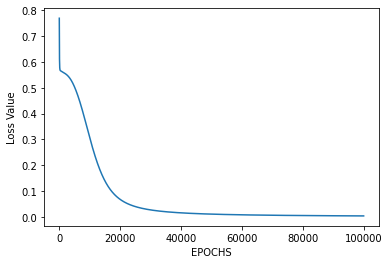

AND Output - [[0. 1. 0. 0.]]


 OR Gate


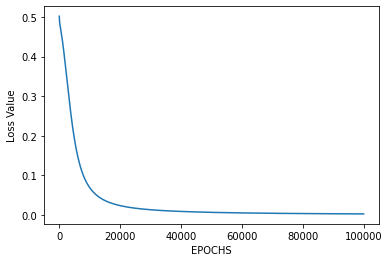

OR Output - [[1. 1. 0. 1.]]


 XOR Gate


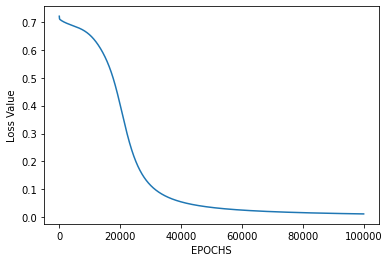

XOR Output - [[1. 0. 0. 1.]]


In [ ]:
# Python Libraries
import numpy as np
from matplotlib import pyplot as plt

# Define Activation Function - Sigmoid
def sigmoid(z):
	return 1 / (1 + np.exp(-z)) # Definition of Sigmoid Function

# Define neural network parameters
# Initialized all the weights (W1,W2) between 0 and 1, Bias values (b1,b2) are initialized to 0
def defineParameters(inputs, hiddenLayerNeurons, output):
	W1 = np.random.randn(hiddenLayerNeurons, inputs)
	W2 = np.random.randn(output, hiddenLayerNeurons)
	b1 = np.zeros((hiddenLayerNeurons, 1))
	b2 = np.zeros((output, 1))
	
	parameters = {"Weight 1" : W1, "bias 1": b1,
				"Weight 2" : W2, "bias 2": b2}
	return parameters

# To train the neural network, 'Forward Propagation' and 'Backward Propagation' Functions

# Forward Propagation
def forwardPropagation(X, Y, parameters):
	m = X.shape[1]
	W1 = parameters["Weight 1"]
	W2 = parameters["Weight 2"]
	b1 = parameters["bias 1"]
	b2 = parameters["bias 2"]

	V1 = np.dot(W1, X) + b1
	A1 = sigmoid(V1)
	V2 = np.dot(W2, A1) + b2
	A2 = sigmoid(V2)

	stack = (V1, A1, W1, b1, V2, A2, W2, b2) 
	logProbability = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y)) # Calculating log probability 
	cost = -np.sum(logProbability) / m
	return cost, stack, A2

# Backward Propagation
def backwardPropagation(X, Y, stack):
	m = X.shape[1]
	(V1, A1, W1, b1, V2, A2, W2, b2) = stack
	
	dV2 = A2 - Y
	dW2 = np.dot(dV2, A1.T) / m
	db2 = np.sum(dV2, axis = 1, keepdims = True)
	
	dA1 = np.dot(W2.T, dV2)
	dV1 = np.multiply(dA1, A1 * (1- A1))
	dW1 = np.dot(dV1, X.T) / m
	db1 = np.sum(dV1, axis = 1, keepdims = True) / m
	
	gradients = {"dV2": dV2, "dW2": dW2, "db2": db2,
				"dV1": dV1, "dW1": dW1, "db1": db1}
	return gradients

# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
	parameters["Weight 1"] = parameters["Weight 1"] - learningRate * gradients["dW1"]
	parameters["Weight 2"] = parameters["Weight 2"] - learningRate * gradients["dW2"]
	parameters["bias 1"] = parameters["bias 1"] - learningRate * gradients["db1"]
	parameters["bias 2"] = parameters["bias 2"] - learningRate * gradients["db2"]
	return parameters

print("AND Gate")

# Model to learn the AND truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output

# Define model parameters
hiddenLayerNeurons = 2 # no of hidden layer neurons-2
inputs = X.shape[0] # no of inputs-2
output = Y.shape[0] # no of output-1
parameters = defineParameters(inputs, hiddenLayerNeurons, output)
epoch = 100000
learningRate = 0.01
lossVal = np.zeros((epoch, 1))

for i in range(epoch):
	lossVal[i, 0], stack, A2 = forwardPropagation(X, Y, parameters)
	gradients = backwardPropagation(X, Y, stack)
	parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(lossVal)
plt.xlabel("EPOCHS")
plt.ylabel("Loss Value")
plt.show()

# Testing
# AND input
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) 
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0

# print(A2)
print("AND Output -", prediction)


print("\n\n OR Gate")

# Model to learn the OR truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # OR input
Y = np.array([[0, 1, 1, 1]]) # OR output

# Define model parameters
hiddenLayerNeurons = 2 # no of hidden layer neurons-2
inputs = X.shape[0] # no of inputs-2
output = Y.shape[0] # no of output-1
parameters = defineParameters(inputs, hiddenLayerNeurons, output)
epoch = 100000
learningRate = 0.01
lossVal = np.zeros((epoch, 1))

for i in range(epoch):
	lossVal[i, 0], stack, A2 = forwardPropagation(X, Y, parameters)
	gradients = backwardPropagation(X, Y, stack)
	parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(lossVal)
plt.xlabel("EPOCHS")
plt.ylabel("Loss Value")
plt.show()

# Testing
# OR input
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) 
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0

# print(A2)
print("OR Output -", prediction)


print("\n\n XOR Gate")

# Model to learn the XOR truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input
Y = np.array([[0, 1, 1, 0]]) # XOR output

# Define model parameters
hiddenLayerNeurons = 2 # no of hidden layer neurons-2
inputs = X.shape[0] # no of inputs-2
output = Y.shape[0] # no of output-1
parameters = defineParameters(inputs, hiddenLayerNeurons, output)
epoch = 100000
learningRate = 0.01
lossVal = np.zeros((epoch, 1))

for i in range(epoch):
	lossVal[i, 0], stack, A2 = forwardPropagation(X, Y, parameters)
	gradients = backwardPropagation(X, Y, stack)
	parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(lossVal)
plt.xlabel("EPOCHS")
plt.ylabel("Loss Value")
plt.show()

# Testing
# XOR input
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) 
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0

# print(A2)
print("XOR Output -", prediction)

